<a href="https://colab.research.google.com/github/ManjunathAdi/Bandits/blob/main/Multi_Arm_Bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bhagavan Mahamrityunjaya Mahadev

# Implementation of several bandit algorithms for personalized recommendation systems.


The most common bandit algorithms include:

* 1.] Epsilon-Greedy: Selects actions either greedily (based on the highest estimated reward) or randomly (to explore new options).
* 2.] Upper Confidence Bound (UCB1): Balances exploration and exploitation by considering both the average reward of an action and the uncertainty in that estimate.
* 3.] Thompson Sampling: Samples from the posterior distribution of each action's reward, favoring actions with greater uncertainty.

# Step 1: Load a Sample Dataset

Let's assume we have a simple dataset where we simulate user interactions with three different items.
Each row represents an interaction where a user receives a recommendation and gives a binary feedback (reward) indicating whether they liked the recommendation (reward = 1) or not (reward = 0).

In [12]:

#For simplicity, we'll simulate this dataset in code:
import numpy as np
import random

# Simulated probabilities of receiving a reward (1) for each arm (item)
true_conversion_rates = [0.1, 0.2, 0.3]  # Arm 0 has 10% chance, Arm 1 has 20%, Arm 2 has 30%

# Function to simulate user interaction for each arm
def simulate_user_interaction(arm):
    return 1 if random.random() < true_conversion_rates[arm] else 0

# Simulating 1000 user interactions
np.random.seed(42)
n_interactions = 100000
n_arms = len(true_conversion_rates)

# Logs of interactions: [(chosen_arm, reward)]
interaction_logs = [(random.randrange(n_arms), simulate_user_interaction(random.randrange(n_arms))) for _ in range(n_interactions)]
len(interaction_logs)

100000

In [13]:
interaction_logs[0:8]

[(2, 0), (1, 1), (1, 0), (2, 0), (1, 0), (0, 0), (2, 1), (2, 1)]

# Step 2: Implement Epsilon-Greedy Bandit Algorithm
Epsilon-Greedy randomly explores other arms (recommendations) with a probability epsilon and exploits the best-known arm (highest average reward) the rest of the time. This ensures a balance between exploration and exploitation.

In [7]:

class EpsilonGreedyBandit:
    def __init__(self, n_arms, epsilon=0.1):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = [0] * n_arms  # Track the number of times each arm was chosen
        self.values = [0.0] * n_arms  # Estimated value (mean reward) of each arm

    def select_arm(self):
        # With probability epsilon, explore a random arm
        if random.random() < self.epsilon:
            return random.randrange(self.n_arms)
        # Otherwise, exploit the best-known arm (highest estimated value)
        return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        # Update the estimated value of the chosen arm
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        # Incremental mean update
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward


# Step 3: Implement Upper Confidence Bound (UCB1) Algorithm

UCB1 chooses the arm that has the best balance between having a high average reward and being relatively unexplored.
The uncertainty is represented by the confidence interval, and UCB1 tries to exploit arms that have high potential but haven’t been explored enough.

In [8]:
import math

class UCB1Bandit:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = [0] * n_arms  # Number of times each arm was pulled
        self.values = [0.0] * n_arms  # Average reward of each arm

    def select_arm(self):
        total_counts = sum(self.counts)
        if total_counts < self.n_arms:
            # Explore all arms at least once
            return total_counts
        # Calculate UCB1 values for each arm
        ucb_values = [0.0] * self.n_arms
        for arm in range(self.n_arms):
            bonus = math.sqrt((2 * math.log(total_counts)) / self.counts[arm])
            ucb_values[arm] = self.values[arm] + bonus
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        # Update the estimated value of the chosen arm
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        # Incremental mean update
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward


# Step 4: Implement Thompson Sampling Algorithm

Thompson Sampling draws samples from the posterior distribution of each arm's reward and selects the arm with the highest sampled reward.
It implicitly balances exploration and exploitation by sampling from uncertain arms more frequently.

In [9]:
import numpy as np

class ThompsonSamplingBandit:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.successes = [0] * n_arms  # Number of successful rewards for each arm
        self.failures = [0] * n_arms  # Number of failures (non-rewards) for each arm

    def select_arm(self):
        # Sample from the Beta distribution for each arm
        sampled_values = [np.random.beta(self.successes[arm] + 1, self.failures[arm] + 1) for arm in range(self.n_arms)]
        # Select the arm with the highest sampled value
        return np.argmax(sampled_values)

    def update(self, chosen_arm, reward):
        if reward == 1:
            self.successes[chosen_arm] += 1
        else:
            self.failures[chosen_arm] += 1


# Step 5: Simulation of the Bandit Algorithms on the Dataset

Now that we have the implementations of the three algorithms, let's simulate each one on the dataset and observe their performance.

In [15]:
# Simulating each bandit algorithm on the dataset
def simulate_bandit(bandit, n_rounds, log=True):
    rewards = []
    for _ in range(n_rounds):
        arm = bandit.select_arm()
        reward = simulate_user_interaction(arm)
        bandit.update(arm, reward)
        rewards.append(reward)
    return rewards

# Run simulation for each algorithm
n_rounds = 100000

# Epsilon-Greedy Bandit
eg_bandit = EpsilonGreedyBandit(n_arms=n_arms, epsilon=0.1)
eg_rewards = simulate_bandit(eg_bandit, n_rounds)

# UCB1 Bandit
ucb1_bandit = UCB1Bandit(n_arms=n_arms)
ucb1_rewards = simulate_bandit(ucb1_bandit, n_rounds)

# Thompson Sampling Bandit
ts_bandit = ThompsonSamplingBandit(n_arms=n_arms)
ts_rewards = simulate_bandit(ts_bandit, n_rounds)

# Summarize results
print(f"Epsilon-Greedy total reward: {sum(eg_rewards)}")
print(f"UCB1 total reward: {sum(ucb1_rewards)}")
print(f"Thompson Sampling total reward: {sum(ts_rewards)}")


Epsilon-Greedy total reward: 29154
UCB1 total reward: 29988
Thompson Sampling total reward: 29865


# Step 6: Visualize the Performance

To better understand how each algorithm performs over time, we can visualize cumulative reward obtained by each bandit over the rounds.

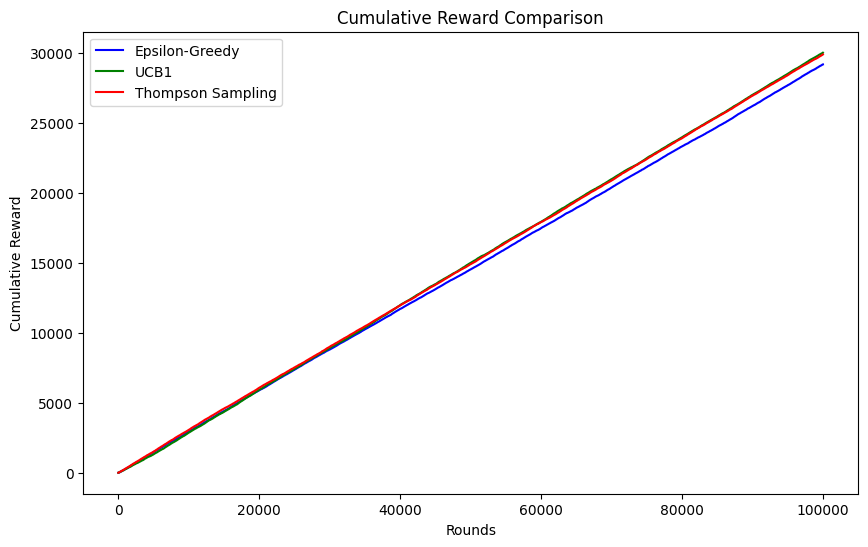

In [16]:
import matplotlib.pyplot as plt

# Calculate cumulative rewards for each algorithm
def cumulative_rewards(rewards):
    return np.cumsum(rewards)

eg_cum_rewards = cumulative_rewards(eg_rewards)
ucb1_cum_rewards = cumulative_rewards(ucb1_rewards)
ts_cum_rewards = cumulative_rewards(ts_rewards)

# Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(eg_cum_rewards, label="Epsilon-Greedy", color="blue")
plt.plot(ucb1_cum_rewards, label="UCB1", color="green")
plt.plot(ts_cum_rewards, label="Thompson Sampling", color="red")
plt.title("Cumulative Reward Comparison")
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.show()


# Step 7: Results and Interpretation

* Epsilon-Greedy: This algorithm will balance exploration and exploitation. It may take longer to converge on the best arm but will eventually favor the arm with the highest reward.
* UCB1: This algorithm tends to explore more in the beginning but quickly focuses on arms that show the most promise, leading to faster convergence.
* Thompson Sampling: It balances exploration and exploitation in a more probabilistic way. It tends to perform well when rewards are uncertain, often outperforming Epsilon-Greedy and UCB1.

By running this simulation, we were able to see how the cumulative rewards of each algorithm differ over time.
Thompson Sampling and UCB1 usually outperform Epsilon-Greedy, especially in environments with fewer arms and clear differences in reward probabilities.